In [34]:
import pandas as pd
import json
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec

#map
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from mpl_toolkits.basemap import Basemap
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib


from wordcloud import WordCloud

In [3]:
#read business file
business = pd.read_json('/Users/lynn/Downloads/yelp_dataset/business.json',lines=True)
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"Water Purification Services, Water Heater Inst...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Books, Mags, Music & Video, Shopping",None
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Contractors, Landscaping, Mason...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Barbers","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1..."


In [5]:
#crate a new dataframe called Restaurants, find out all business related to restaurant
Restaurants=business[business['categories'].str.contains("Restaurants")==True]
Restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192587,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
192589,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
192595,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
192596,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [12]:
#we find out that 'ON' or some other states are not belong to US, thus we filter out all of un-realted state code 
us_Restaurants=Restaurants[~Restaurants['state'].isin(['ON','QC','AB','XWY','CON','BC'])]
us_Restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
23,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Sandwiches, Salad, Restaurants, Burgers, Comfo...",None


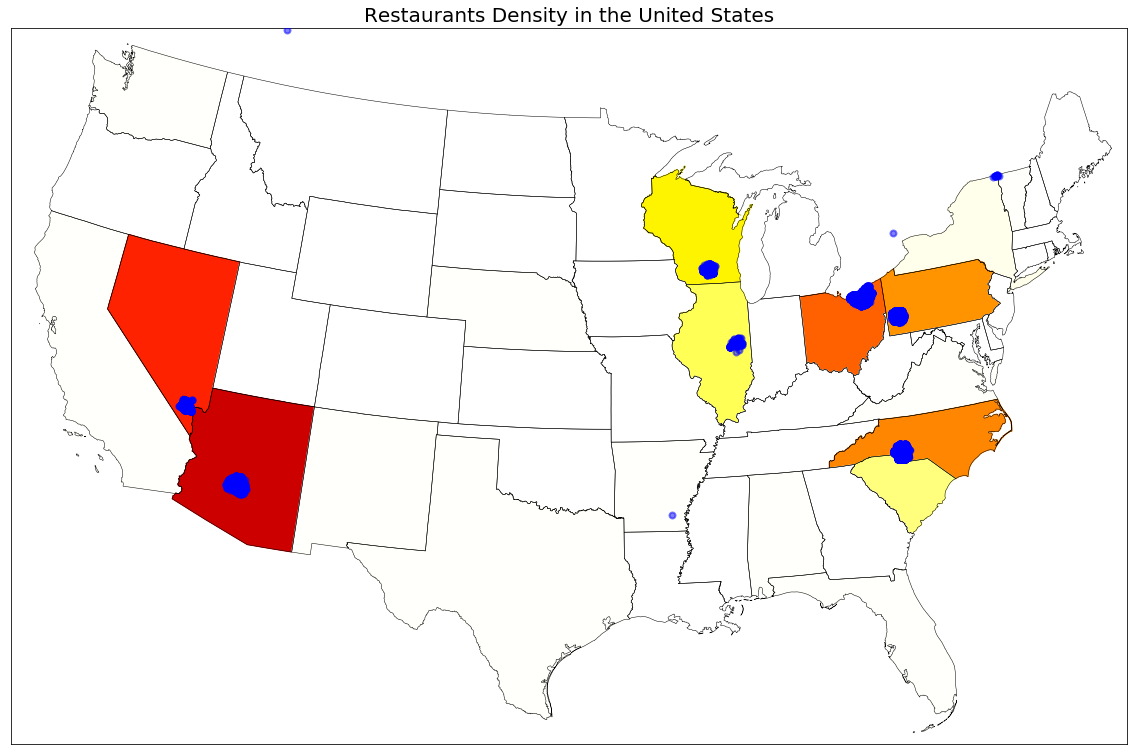

In [13]:
d=Restaurants.groupby('state').business_id.count().to_frame()
tmp=d.to_dict()['business_id']
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
state_business_dict = {}
for a,n in short_state_names.items():
    if a in tmp:
        state_business_dict[n]=tmp[a]
        

plt.figure(figsize=(20, 14))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/Users/lynn/Downloads/st99_d00/st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 11465 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = 0
        if statename in state_business_dict:
            pop = state_business_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/((vmax-vmin)*2)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Restaurants Density in the United States', fontsize=20)
mloc = m(us_Restaurants['longitude'].to_numpy(), us_Restaurants['latitude'].to_numpy())
m.scatter(mloc[0],mloc[1],color ='blue',lw=2,alpha=0.5,zorder=3)
plt.show()

Text(0.5, 0, 'States ')

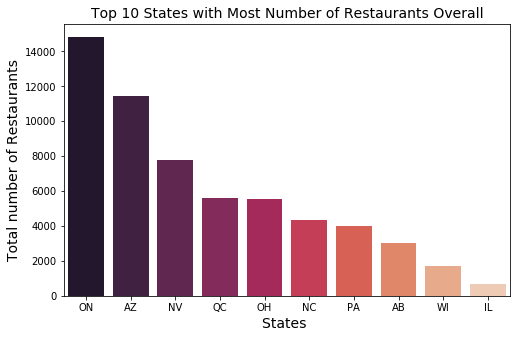

In [18]:
#select top 10 states with most number of restaurants overall
Top10_state = Restaurants['state'].value_counts()[:10]
Top10_state 

#visulaized top 10 states with the most number of restaurant overall
plt.figure(figsize=(8,5))
aTop10_state= sns.barplot(Top10_state.index, Top10_state.values, palette="rocket")
plt.title("Top 10 States with Most Number of Restaurants Overall",fontsize=14)
plt.ylabel('Total number of Restaurants', fontsize=14)
plt.xlabel('States ', fontsize=14) 


[Text(0, 0, 'Toronto'),
 Text(0, 0, 'Las Vegas'),
 Text(0, 0, 'Phoenix'),
 Text(0, 0, 'Montréal'),
 Text(0, 0, 'Calgary'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Scottsdale'),
 Text(0, 0, 'Cleveland'),
 Text(0, 0, 'Mississauga')]

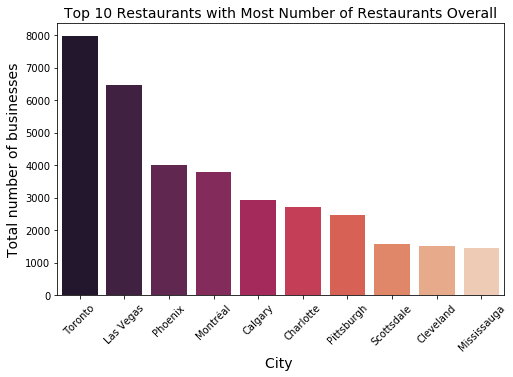

In [19]:
Top10_city = Restaurants['city'].value_counts()[:10]

Top10_city

#visulaized top 10 cities with the most number of restaurant overall
plt.figure(figsize=(8,5))
aTop10_city= sns.barplot(Top10_city.index, Top10_city.values, palette="rocket")
plt.title("Top 10 Restaurants with Most Number of Restaurants Overall",fontsize=14)
plt.ylabel('Total number of businesses', fontsize=14)
plt.xlabel('City ', fontsize=14)
aTop10_city.set_xticklabels(aTop10_city.get_xticklabels(), rotation=45)

Text(0.5, 0, 'Sates ')

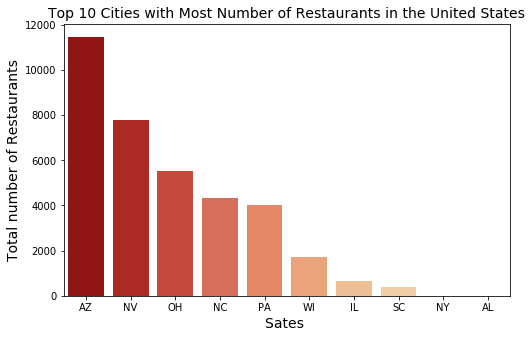

In [20]:
#after filter, we rank the total number of restaurant in the United States by state code
Top10_us_state = us_Restaurants['state'].value_counts()[:10]
Top10_us_state

#visulaized top 10 states with the most number of restaurant in the United States
plt.figure(figsize=(8,5))
aTop10_us_state= sns.barplot(Top10_us_state.index, Top10_us_state.values,palette="OrRd_r")
plt.title("Top 10 Cities with Most Number of Restaurants in the United States",fontsize=14)
plt.ylabel('Total number of Restaurants', fontsize=14)
plt.xlabel('Sates ', fontsize=14)


[Text(0, 0, 'Las Vegas'),
 Text(0, 0, 'Phoenix'),
 Text(0, 0, 'Charlotte'),
 Text(0, 0, 'Pittsburgh'),
 Text(0, 0, 'Scottsdale'),
 Text(0, 0, 'Cleveland'),
 Text(0, 0, 'Mesa'),
 Text(0, 0, 'Madison'),
 Text(0, 0, 'Tempe'),
 Text(0, 0, 'Henderson')]

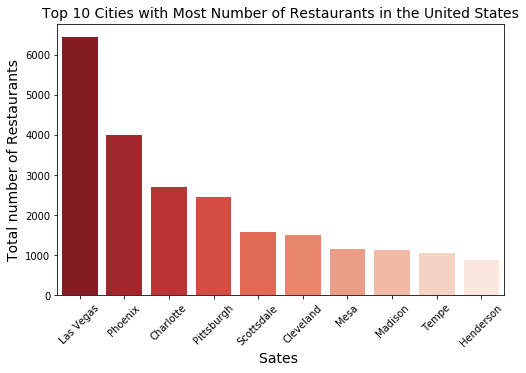

In [23]:
#after filter, we rank the total number of restaurant in the United States by city
Top10_us_city = us_Restaurants['city'].value_counts()[:10]
Top10_us_city


#visulaized top 10 cities with the most number of restaurant in the United States
plt.figure(figsize=(8,5))
aTop10_us_city= sns.barplot(Top10_us_city.index, Top10_us_city.values,palette="Reds_r")
plt.title("Top 10 Cities with Most Number of Restaurants in the United States",fontsize=14)
plt.ylabel('Total number of Restaurants', fontsize=14)
plt.xlabel('Sates ', fontsize=14)
aTop10_us_city.set_xticklabels(aTop10_us_city.get_xticklabels(), rotation=45)

Text(0.5, 0, 'Star Ratings ')

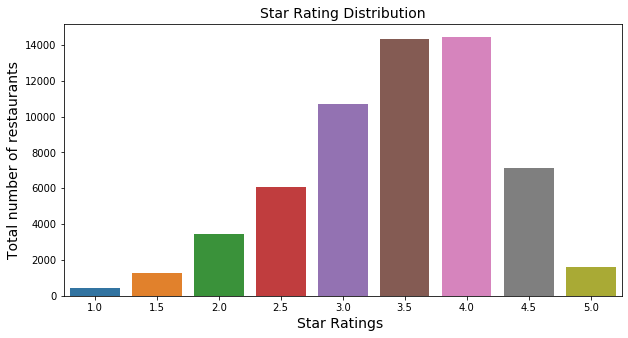

In [47]:
#count stars
stars = Restaurants['stars'].value_counts()
stars
#viz
plt.figure(figsize=(10,5))
astars= sns.barplot(stars.index, stars.values)    
plt.title("Star Rating Distribution",fontsize=14)
plt.ylabel('Total number of restaurants', fontsize=14)
plt.xlabel('Star Ratings ', fontsize=14)


No handles with labels found to put in legend.


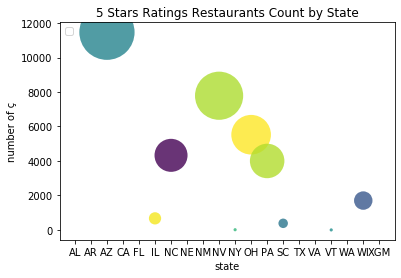

<Figure size 1152x648 with 0 Axes>

In [26]:
def my_agg(x):
    names = {
        'business_id': x['business_id'].count(),
        '5-star-business': x[x['stars']==5.0]['business_id'].count()}

    return pd.Series(names)

state_whitelist=us_Restaurants['state'].value_counts()[:10].index.tolist()
bubble_frame=us_Restaurants.groupby(['state']).apply(my_agg).fillna(0)
x= bubble_frame.index
y= bubble_frame['business_id']
z= bubble_frame['5-star-business']*10

# for index, row in bubble_frame.iterrows():
#   for col in bubble_frame.columns:
#     x.append(index)
#     y.append(col)
#     z.append(row[col])
colors = np.random.rand(len(x)) 
plt.scatter(x, y, z,c=colors,edgecolors='none', alpha = 0.8)
plt.xlabel('state')
plt.ylabel('number of ç')
plt.title('5 Stars Ratings Restaurants Count by State')
plt.legend(loc=2)
plt.figure(figsize=(16,9))
plt.show()

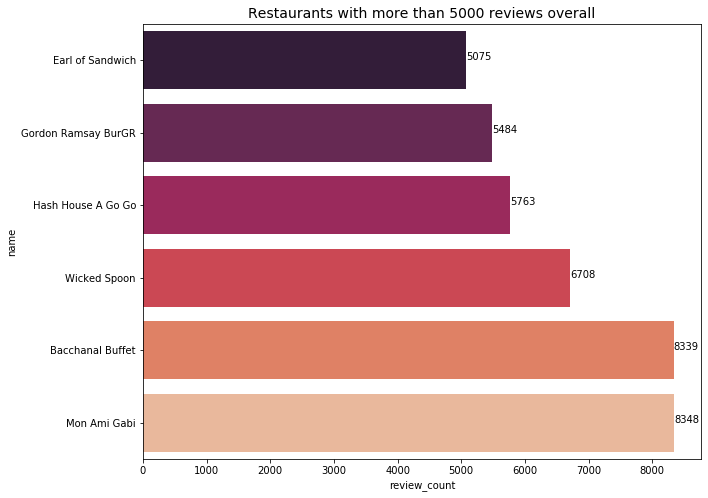

                        Overall average review count  68.45645180306884


In [27]:
#the overall average review count is 68.45, below top resturants' review count are more than 5000 which are pretty far away from average.

sorted2 = Restaurants.sort_values('review_count')
plt.figure(figsize = (10,8))
sns.barplot(sorted2[sorted2['review_count'] >5000]['review_count'],sorted2[sorted2['review_count'] >5000]['name'],
           palette = 'rocket')
pairs2=sorted2[sorted2['review_count'] >5000][['review_count','name']].to_numpy()

i = 0
for _,v in enumerate(pairs2):
    plt.text(v[0]+0.5, i, str(v[0]))
    i=i+1
    
plt.title('Restaurants with more than 5000 reviews overall',fontsize=14);
plt.show()
print('                        Overall average review count ',Restaurants['review_count'].mean())

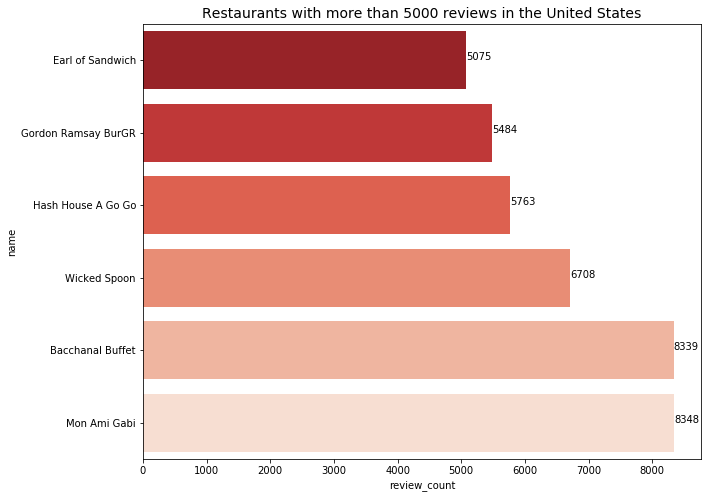

                    Average review count in the United States 92.23451043786059


In [39]:
#the average review count of the United States restaurant is 92, below top resturants' review count are more than 5000 which are pretty far away from average.

sorted = us_Restaurants.sort_values('review_count')
plt.figure(figsize = (10,8))
sns.barplot(sorted[sorted['review_count'] >5000]['review_count'],sorted[sorted['review_count'] >5000]['name'],
           palette="Reds_r")
pairs=sorted[sorted['review_count'] >5000][['review_count','name']].to_numpy()

i = 0
for _,v in enumerate(pairs):
    plt.text(v[0]+0.5, i, str(v[0]))
    i=i+1

plt.title('Restaurants with more than 5000 reviews in the United States',fontsize=14);
plt.show()
print('                    Average review count in the United States',us_Restaurants['review_count'].mean())

Text(0.5, 0, 'count ')

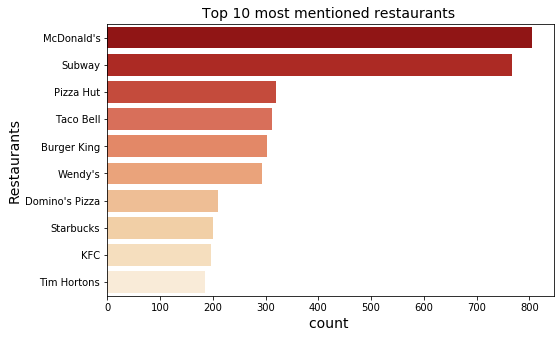

In [32]:
Top10Restaurants = Restaurants['name'].value_counts()[:10]
Top10Restaurants
#Top 10 name of restaurants overall that have been mentioned in this dataset
plt.figure(figsize=(8,5))
aTop10Restaurants= sns.barplot(Top10Restaurants.values, Top10Restaurants.index ,palette="OrRd_r")
plt.title("Top 10 most mentioned restaurants ",fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.xlabel('count ', fontsize=14)

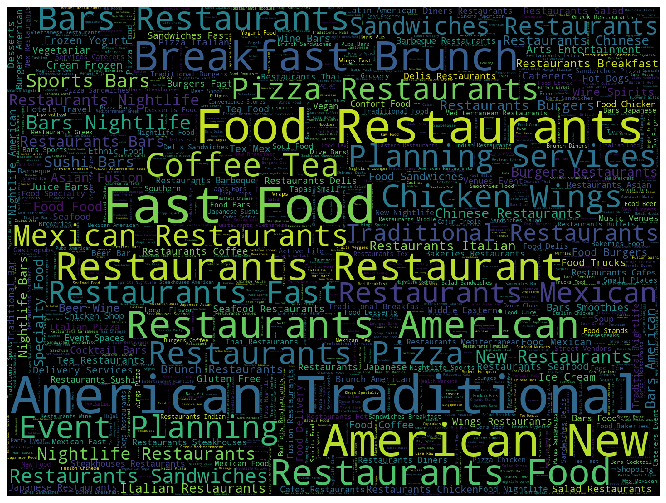

In [37]:
cloud = WordCloud(width=1440, height= 1080,max_words= 100000).generate(' '.join(us_Restaurants['categories'].astype(str)))
plt.figure(figsize=(16, 9))
plt.imshow(cloud)
plt.axis('off');